<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20221224.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* Customer Analysis
* Iterators

In [1]:
import pandas as pd 
import numpy as np
import plotnine as gg
from plotnine import ggplot, aes
import matplotlib.pyplot as plt 
import seaborn as sns 
import os
import re 

from functools import reduce
from collections import defaultdict

# Customer Analysis

In [2]:
os.listdir()

['.config',
 'sales.csv',
 'online_retail.xlsx',
 '1_order_payments_dataset.csv',
 'online_retail_II.xlsx',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 'scanner_data.csv',
 '1_customers_dataset.csv',
 'match_result_test.csv',
 'WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv',
 '1_orders_dataset.csv',
 'sales_vs_discount.csv',
 'KPMG_VI_New_raw_data_update_final.csv',
 'mall_customers.csv',
 'WA_Fn-UseC_-Telco-Customer-Churn.csv',
 'bz_data_analyis.csv',
 'mock_sales_data.csv',
 'groceries.csv',
 'test.csv',
 'sales_data_with_stores.csv',
 'sample-sales-data.csv',
 'ecommerce-data.csv',
 'sample_data']

In [32]:
df = pd.read_csv('bz_data_analyis.csv')
df['quantity_ordered'] = [1 if re.findall('[A-Z]', str(a)) else int(a) for a in df['quantity_ordered']]
df['order_date'] = pd.to_datetime(df['order_date'])
df['date'] = df['order_date'].to_numpy().astype('datetime64[D]')
df['weekday'] = df['date'].dt.weekday
df.head()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.


,customer_id,product,quantity_ordered,price_each,purchase_address,month,year,day,city,code,sales,order_date,hour,minute,count,date,weekday
0,295665,Macbook Pro Laptop,1,1700.00,"136 Church St, New York City, NY 10001",12,2019,30,New York City (NY),NY,1700.00,2019-12-30 00:01:00,0,1,1,2019-12-30,0
1,295666,LG Washing Machine,3,600.00,"562 2nd St, New York City, NY 10001",12,2019,29,New York City (NY),NY,600.00,2019-12-29 07:03:00,7,3,1,2019-12-29,6
2,295667,USB-C Charging Cable,3,11.95,"277 Main St, New York City, NY 10001",12,2019,12,New York City (NY),NY,11.95,2019-12-12 18:21:00,18,21,1,2019-12-12,3
3,295668,27in FHD Monitor,2,149.99,"410 6th St, San Francisco, CA 94016",12,2019,22,San Francisco (CA),CA,149.99,2019-12-22 15:13:00,15,13,1,2019-12-22,6
4,295669,USB-C Charging Cable,1,11.95,"43 Hill St, Atlanta, GA 30301",12,2019,18,Atlanta (GA),GA,11.95,2019-12-18 12:38:00,12,38,1,2019-12-18,2


In [33]:
list_weekday = dict(zip(range(7), ['mon','tue','wed','thu','fri','sat','sun']))
df['weekday'] = df['weekday'].apply(lambda x : list_weekday.get(x,x))
df.head()

,customer_id,product,quantity_ordered,price_each,purchase_address,month,year,day,city,code,sales,order_date,hour,minute,count,date,weekday
0,295665,Macbook Pro Laptop,1,1700.00,"136 Church St, New York City, NY 10001",12,2019,30,New York City (NY),NY,1700.00,2019-12-30 00:01:00,0,1,1,2019-12-30,mon
1,295666,LG Washing Machine,3,600.00,"562 2nd St, New York City, NY 10001",12,2019,29,New York City (NY),NY,600.00,2019-12-29 07:03:00,7,3,1,2019-12-29,sun
2,295667,USB-C Charging Cable,3,11.95,"277 Main St, New York City, NY 10001",12,2019,12,New York City (NY),NY,11.95,2019-12-12 18:21:00,18,21,1,2019-12-12,thu
3,295668,27in FHD Monitor,2,149.99,"410 6th St, San Francisco, CA 94016",12,2019,22,San Francisco (CA),CA,149.99,2019-12-22 15:13:00,15,13,1,2019-12-22,sun
4,295669,USB-C Charging Cable,1,11.95,"43 Hill St, Atlanta, GA 30301",12,2019,18,Atlanta (GA),GA,11.95,2019-12-18 12:38:00,12,38,1,2019-12-18,wed


In [34]:
list_product = df['product'].value_counts().reset_index().rename(columns = {'index':'product', 'product':'cnt'})
list_product['type'] = ['cable', 'cable', 'battery', 'battery', 'headphones','headphones','headphones',
                        'monitor', 'mobile', 'monitor', 'monitor', 'mobile', 'tv', 'labtop', 'labtop', 'monitor',
                        'mobile', 'white', 'white']
list_product = dict(zip(list_product['product'], list_product['type']))
df['type'] = df['product'].apply(lambda x : list_product.get(x,x))
df.head()

,customer_id,product,quantity_ordered,price_each,purchase_address,month,year,day,city,code,sales,order_date,hour,minute,count,date,weekday,type
0,295665,Macbook Pro Laptop,1,1700.00,"136 Church St, New York City, NY 10001",12,2019,30,New York City (NY),NY,1700.00,2019-12-30 00:01:00,0,1,1,2019-12-30,mon,labtop
1,295666,LG Washing Machine,3,600.00,"562 2nd St, New York City, NY 10001",12,2019,29,New York City (NY),NY,600.00,2019-12-29 07:03:00,7,3,1,2019-12-29,sun,white
2,295667,USB-C Charging Cable,3,11.95,"277 Main St, New York City, NY 10001",12,2019,12,New York City (NY),NY,11.95,2019-12-12 18:21:00,18,21,1,2019-12-12,thu,cable
3,295668,27in FHD Monitor,2,149.99,"410 6th St, San Francisco, CA 94016",12,2019,22,San Francisco (CA),CA,149.99,2019-12-22 15:13:00,15,13,1,2019-12-22,sun,monitor
4,295669,USB-C Charging Cable,1,11.95,"43 Hill St, Atlanta, GA 30301",12,2019,18,Atlanta (GA),GA,11.95,2019-12-18 12:38:00,12,38,1,2019-12-18,wed,cable


In [35]:
cnt = df.groupby(['weekday', 'hour', 'type'])['quantity_ordered'].sum().reset_index().rename(columns = {'quantity_ordered':'cnt'})
#cnt['hour'] = cnt['hour'].astype(str)
cnt.head()

,weekday,hour,type,cnt
0,fri,0,battery,195
1,fri,0,cable,136
2,fri,0,headphones,156
3,fri,0,labtop,33
4,fri,0,mobile,39


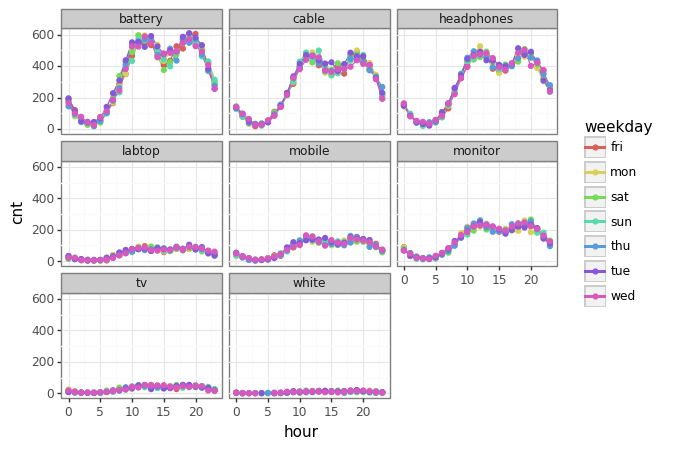

<ggplot: (8773534658931)>

In [37]:
(
    ggplot(cnt, aes('hour', 'cnt', color = 'weekday')) +
    gg.geom_line() +
    gg.geom_point() +
    gg.facet_wrap('~type') +
    gg.theme_bw()
)

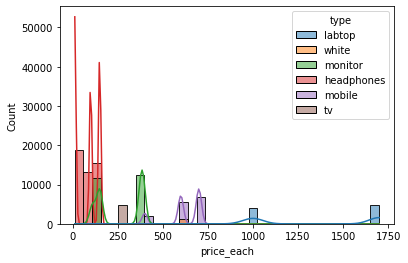

In [41]:
sns.histplot(data = df[~df['type'].isin(['battery', 'cable']) ], x = 'price_each', hue = 'type', kde = True, bins = 35)

# Iterators

In [42]:
users = [{'mail': 'gregorythomas@gmail.com', 'name': 'Brett Holland', 'sex': 'M', 'age': 73},
 {'mail': 'hintoncynthia@hotmail.com', 'name': 'Madison Martinez', 'sex': 'F', 'age': 29},
 {'mail': 'wwagner@gmail.com', 'name': 'Michael Jenkins', 'sex': 'M', 'age': 51},
 {'mail': 'daniel79@gmail.com', 'name': 'Karen Rodriguez', 'sex': 'F', 'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]
users

[{'mail': 'gregorythomas@gmail.com',
  'name': 'Brett Holland',
  'sex': 'M',
  'age': 73},
 {'mail': 'hintoncynthia@hotmail.com',
  'name': 'Madison Martinez',
  'sex': 'F',
  'age': 29},
 {'mail': 'wwagner@gmail.com',
  'name': 'Michael Jenkins',
  'sex': 'M',
  'age': 51},
 {'mail': 'daniel79@gmail.com',
  'name': 'Karen Rodriguez',
  'sex': 'F',
  'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]

In [43]:
{k : eval(f'reduce(lambda acc, cur : acc + [cur["{k}"]], users, [])') for k in list(users[0].keys())}

{'mail': ['gregorythomas@gmail.com',
  'hintoncynthia@hotmail.com',
  'wwagner@gmail.com',
  'daniel79@gmail.com',
  'ujackson@gmail.com'],
 'name': ['Brett Holland',
  'Madison Martinez',
  'Michael Jenkins',
  'Karen Rodriguez',
  'Amber Rhodes'],
 'sex': ['M', 'F', 'M', 'F', 'F'],
 'age': [73, 29, 51, 32, 42]}